In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
# 统一用小键盘上的/
df_train = pd.read_csv("F://Kaggle House/train.csv")

In [24]:
#简单看一下前五条数据
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
#看一下列数据
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [32]:
#看一下最重要的待预测标签
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


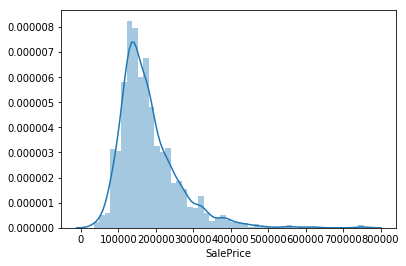

In [34]:
#绘制标签直方图
sns.distplot(df_train['SalePrice'])

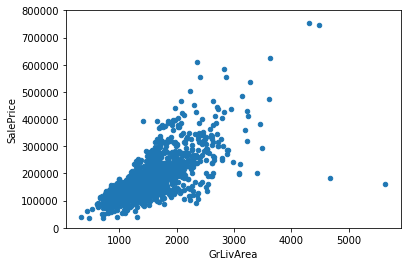

In [46]:
# 绘制 grlivarea/saleprice 散点图
var = 'GrLivArea'
data = pd.concat([ df_train['SalePrice'], df_train[var]], axis=1)
data.head()
data.plot.scatter(x = var, y = 'SalePrice', ylim = (0, 800000))

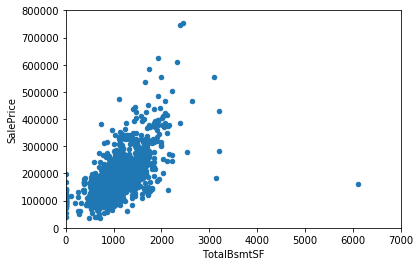

In [62]:
#绘制 totalbsmtsf/saleprice 散点图
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]], axis=1)
data.head()
data.plot.scatter(x = var, y = 'SalePrice', xlim = (0,7000), ylim = (0, 800000))

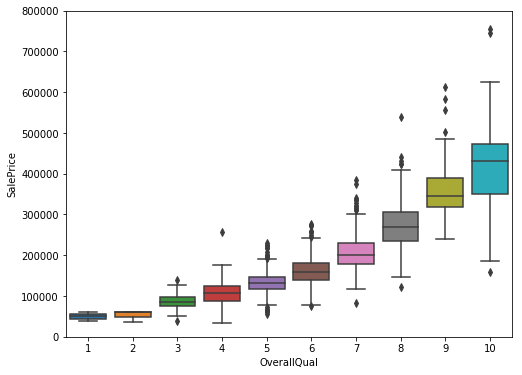

In [72]:
# 绘制 overallqual/saleprice 箱型图
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.head()
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);

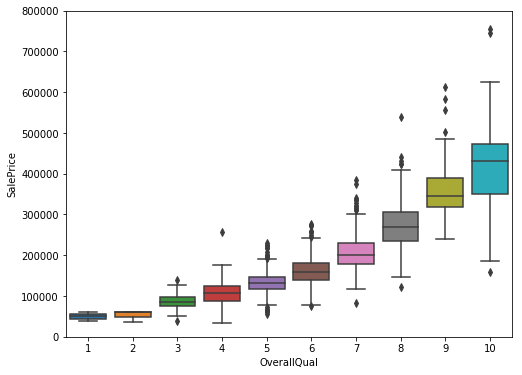

In [79]:
# 绘制 OverallQual/SalePrice 箱型图
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000);

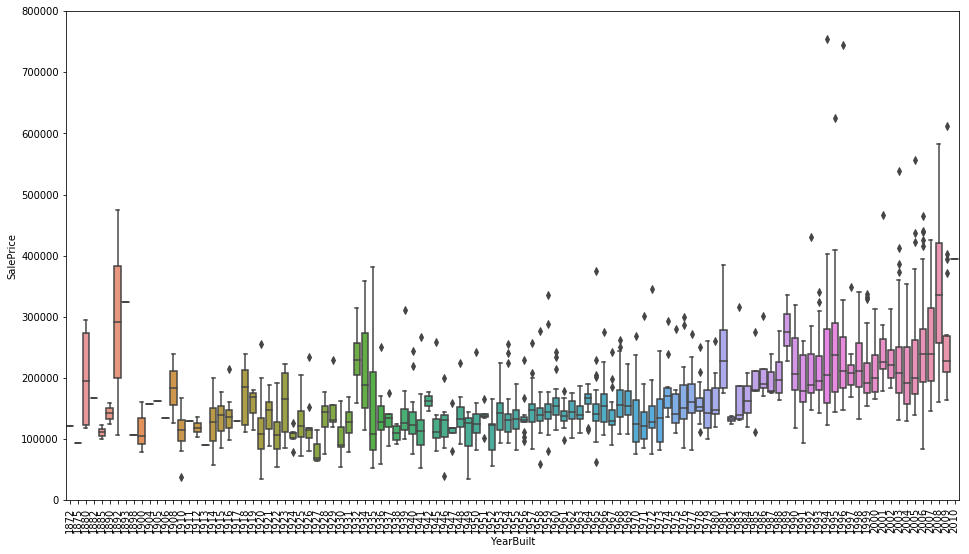

In [100]:
# 绘制 YearBuilt/SalePrice 箱型图
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 9))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
#将x轴的标签垂直显示rotation-旋转
plt.xticks(rotation=90);

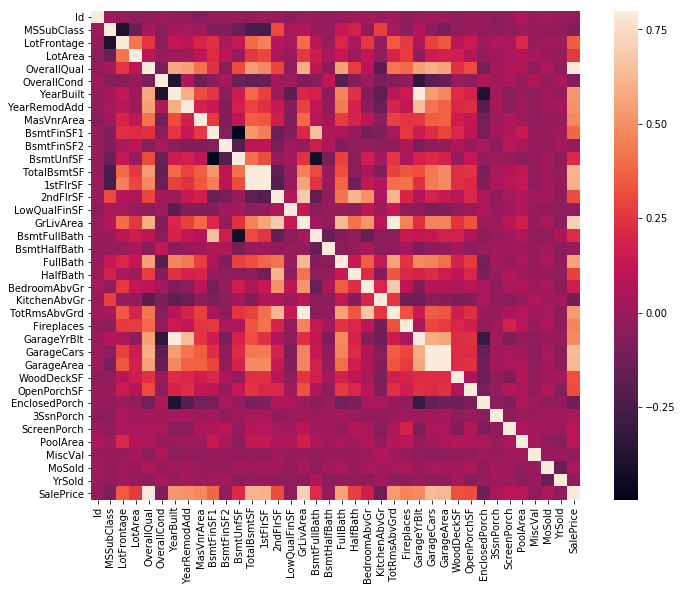

In [106]:
# 大体上查看数据相关性
corr = df_train.corr()
f, ax = plt.subplots(figsize=(12,9))
fig = sns.heatmap(data=corr, vmax=.8, square=True)

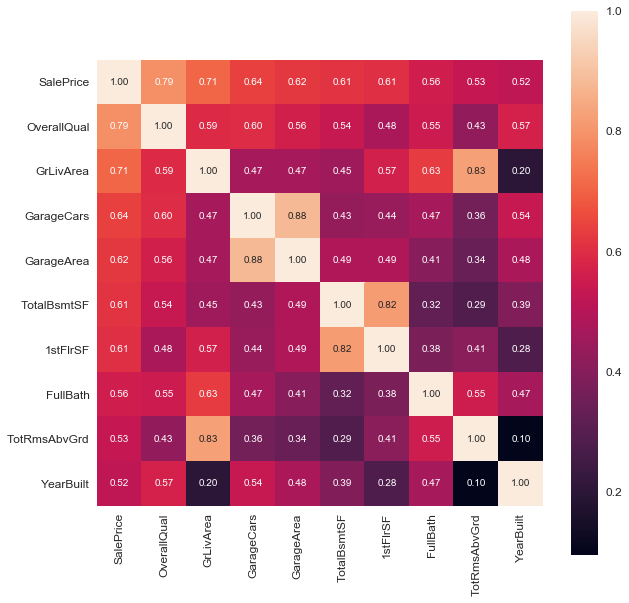

In [184]:
# 查看与SalePrice最相关的k个数据项的相关性
k = 10
cols = corr['SalePrice'].sort_values(ascending=False)[:k].index
data = df_train[cols].corr()
#设定画布大小
f, ax = plt.subplots(figsize=(10, 10))
#修改字体大小
sns.set(font_scale=1.2)
# 右侧的是cbar, 中间的小字是annot, 将其变成正方形是square
sns.heatmap(data=data, cbar=True, annot=True, fmt='.2f',annot_kws={'size':10}, square=True);

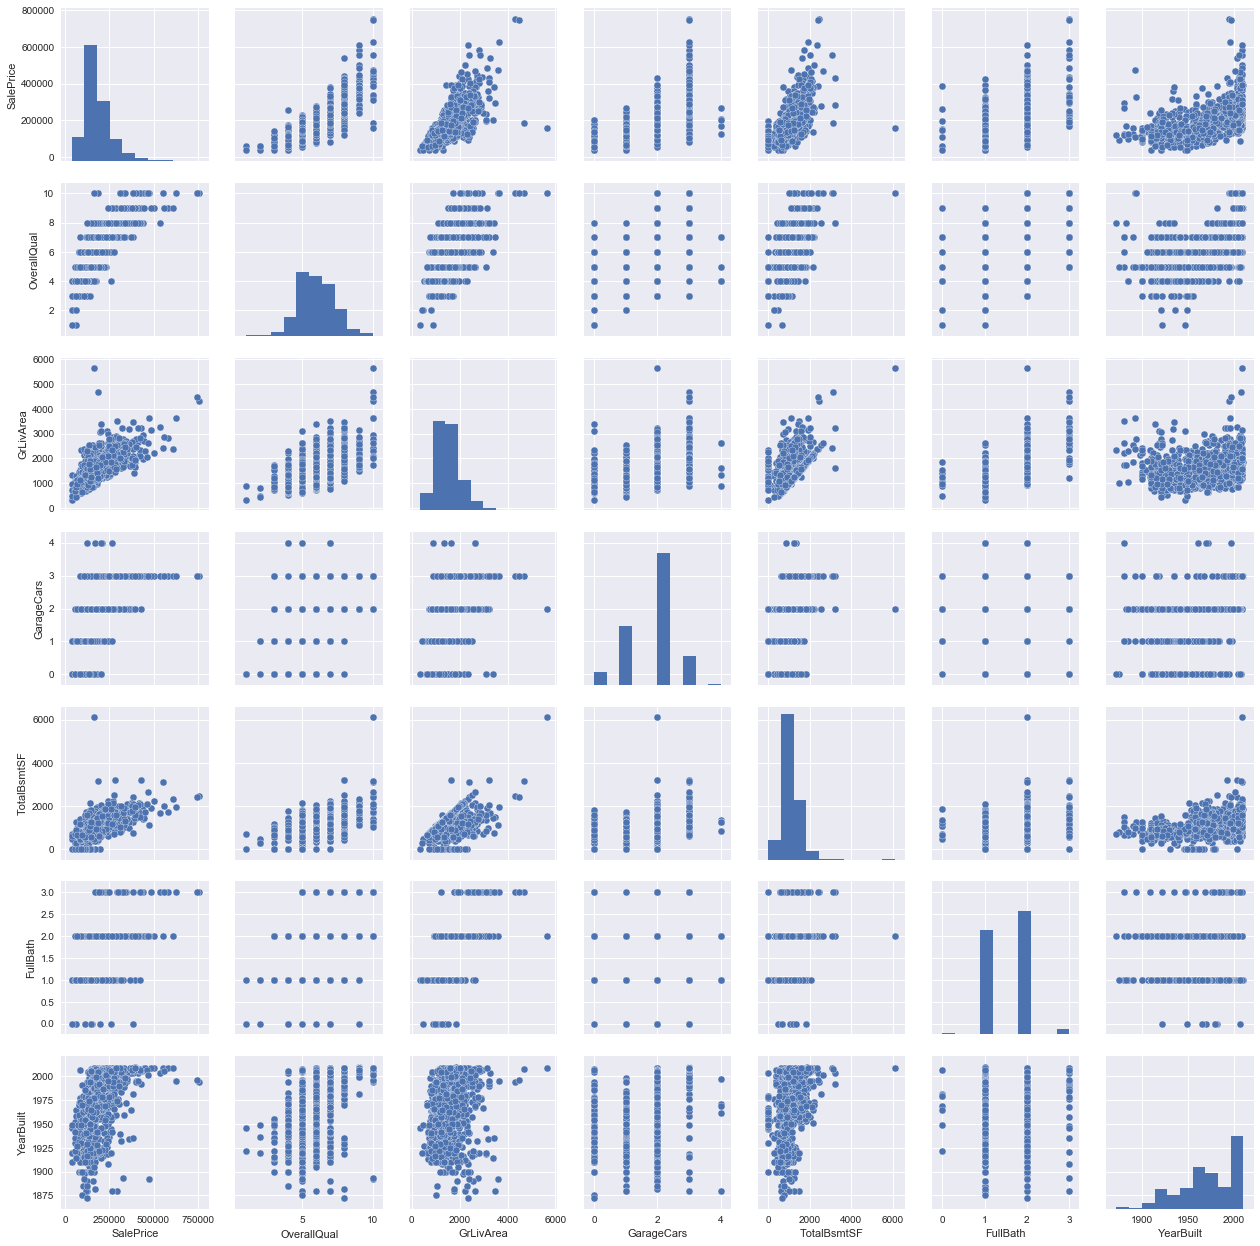

In [187]:
# 绘制pairplot  heatmap是两两的相关性数值，pairplot是两两的散点图
cols  = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols])
plt.show()